In [1]:
# урок взят с https://smart-lab.ru/blog/592975.php
# Сначала испытаем yfianance  пакет. Его можно установить при помощи команды pip install yfinance. 
# Приведенный ниже код показывает, как получить данные для AAPL с 2016 по 2019 год и построить скорректированную цену закрытия
#  (скорректированная цена закрытия на дивиденды и сплиты) на графике.
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf

# Get the data for the stock аэрофлот с московской биржи
data = yf.download('AFLT.ME','2010-01-01','2020-06-02')



[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-03,55.580002,55.580002,54.299999,55.099998,37.158562,547540
2010-03-04,55.200001,55.200001,54.060001,54.799999,36.956253,357044
2010-03-05,54.860001,55.349998,54.799999,55.049999,37.124844,316035
2010-03-09,55.200001,55.660000,53.580002,54.470001,36.733704,1057526
2010-03-10,54.509998,54.880001,53.830002,54.360001,36.659519,456499
...,...,...,...,...,...,...
2020-05-26,74.000000,75.239998,73.720001,74.459999,74.459999,19779520
2020-05-27,74.459999,79.699997,74.160004,77.900002,77.900002,57844870
2020-05-28,78.580002,79.699997,77.860001,79.199997,79.199997,25038330


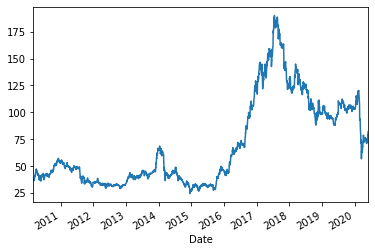

In [4]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()


In [8]:
# Ну а если необходимо получить по нескольким акциям,
#  то необходимо внести небольшое дополнение в код. 
#  Для хранения значений используется DataFrame. 
#  При помощи пакета  matplotlib и полученных данных можно построить график дневной доходности.
# Define the ticker list
import pandas as pd
tickers_list = tickers_list = ['AFLT.ME','YNDX.ME','AFKS.ME','SBER.ME','ROSN.ME']

# Import pandas
data = pd.DataFrame(columns=tickers_list)

# Fetch the data

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2016-01-01','2020-06-02')['Adj Close']

# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AFLT.ME,YNDX.ME,AFKS.ME,SBER.ME,ROSN.ME
Date,,,,,
2016-01-04,45.882889,1064.099976,14.049174,73.977875,206.654190
2016-01-05,44.454147,1133.900024,14.423501,74.642097,208.465500
2016-01-06,44.127579,1112.000000,14.411553,73.102310,207.806839
2016-01-11,42.502903,987.000000,13.997408,68.709381,198.462128
2016-01-12,43.474442,999.000000,13.985460,69.222649,197.515289


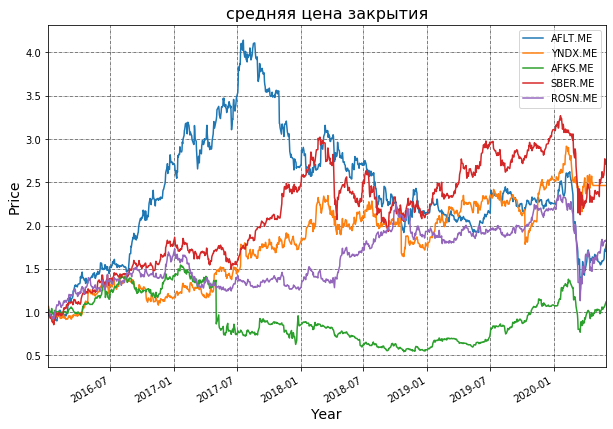

In [10]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Скорректированая цена закрытия", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()